# Importing Libraries

In [279]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

import xgboost as xgb
from sklearn.metrics import roc_curve, auc
#import gradio as gr

#  Importing CSV Data

In [280]:
dataset = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/project/parkinson.csv")
x=dataset.loc[:,dataset.columns!='status'].values[:,1:]
x1=dataset.loc[:,dataset.columns!='status']
y=dataset.loc[:,'status'].values
y1=dataset.loc[:,'status']

# Exploratory Data Analysis(EDA)

In [281]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [282]:
dataset.shape

(195, 24)

In [283]:
dataset.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [284]:
column_name = 'status'
column_index = dataset.columns.get_loc(column_name)

print('Index of column {} is {}'.format(column_name, column_index))

Index of column status is 17


In [285]:
dataset.rename(columns=({'MDVP:Fo(Hz)':'avg_fre', 'MDVP:Fhi(Hz)':'max_fre', 'MDVP:Flo(Hz)':'min_fre', 'MDVP:Jitter(%)':'var_fre1',
       'MDVP:Jitter(Abs)':'var_fre2', 'MDVP:RAP':'var_fre3', 'MDVP:PPQ':'var_fre4', 'Jitter:DDP':'var_fre5',
       'MDVP:Shimmer':'var_amp1', 'MDVP:Shimmer(dB)':'var_amp2', 'Shimmer:APQ3':'var_amp3', 'Shimmer:APQ5':'var_amp4',
       'MDVP:APQ':'var_amp5', 'Shimmer:DDA':'var_amp6'}),inplace=True)
dataset


,name,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [286]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      195 non-null    object 
 1   avg_fre   195 non-null    float64
 2   max_fre   195 non-null    float64
 3   min_fre   195 non-null    float64
 4   var_fre1  195 non-null    float64
 5   var_fre2  195 non-null    float64
 6   var_fre3  195 non-null    float64
 7   var_fre4  195 non-null    float64
 8   var_fre5  195 non-null    float64
 9   var_amp1  195 non-null    float64
 10  var_amp2  195 non-null    float64
 11  var_amp3  195 non-null    float64
 12  var_amp4  195 non-null    float64
 13  var_amp5  195 non-null    float64
 14  var_amp6  195 non-null    float64
 15  NHR       195 non-null    float64
 16  HNR       195 non-null    float64
 17  status    195 non-null    int64  
 18  RPDE      195 non-null    float64
 19  DFA       195 non-null    float64
 20  spread1   195 non-null    float6

In [287]:
dataset.duplicated().sum()

0

In [288]:
dataset.isnull().sum()

name        0
avg_fre     0
max_fre     0
min_fre     0
var_fre1    0
var_fre2    0
var_fre3    0
var_fre4    0
var_fre5    0
var_amp1    0
var_amp2    0
var_amp3    0
var_amp4    0
var_amp5    0
var_amp6    0
NHR         0
HNR         0
status      0
RPDE        0
DFA         0
spread1     0
spread2     0
D2          0
PPE         0
dtype: int64

In [289]:
dataset.columns

Index(['name', 'avg_fre', 'max_fre', 'min_fre', 'var_fre1', 'var_fre2',
       'var_fre3', 'var_fre4', 'var_fre5', 'var_amp1', 'var_amp2', 'var_amp3',
       'var_amp4', 'var_amp5', 'var_amp6', 'NHR', 'HNR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [290]:
dataset.skew()
#calculating the skewness of all parameters

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14188\2340682504.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.skew()


avg_fre     0.591737
max_fre     2.542146
min_fre     1.217350
var_fre1    3.084946
var_fre2    2.649071
var_fre3    3.360708
var_fre4    3.073892
var_fre5    3.362058
var_amp1    1.666480
var_amp2    1.999389
var_amp3    1.580576
var_amp4    1.798697
var_amp5    2.618047
var_amp6    1.580618
NHR         4.220709
HNR        -0.514317
status     -1.187727
RPDE       -0.143402
DFA        -0.033214
spread1     0.432139
spread2     0.144430
D2          0.430384
PPE         0.797491
dtype: float64

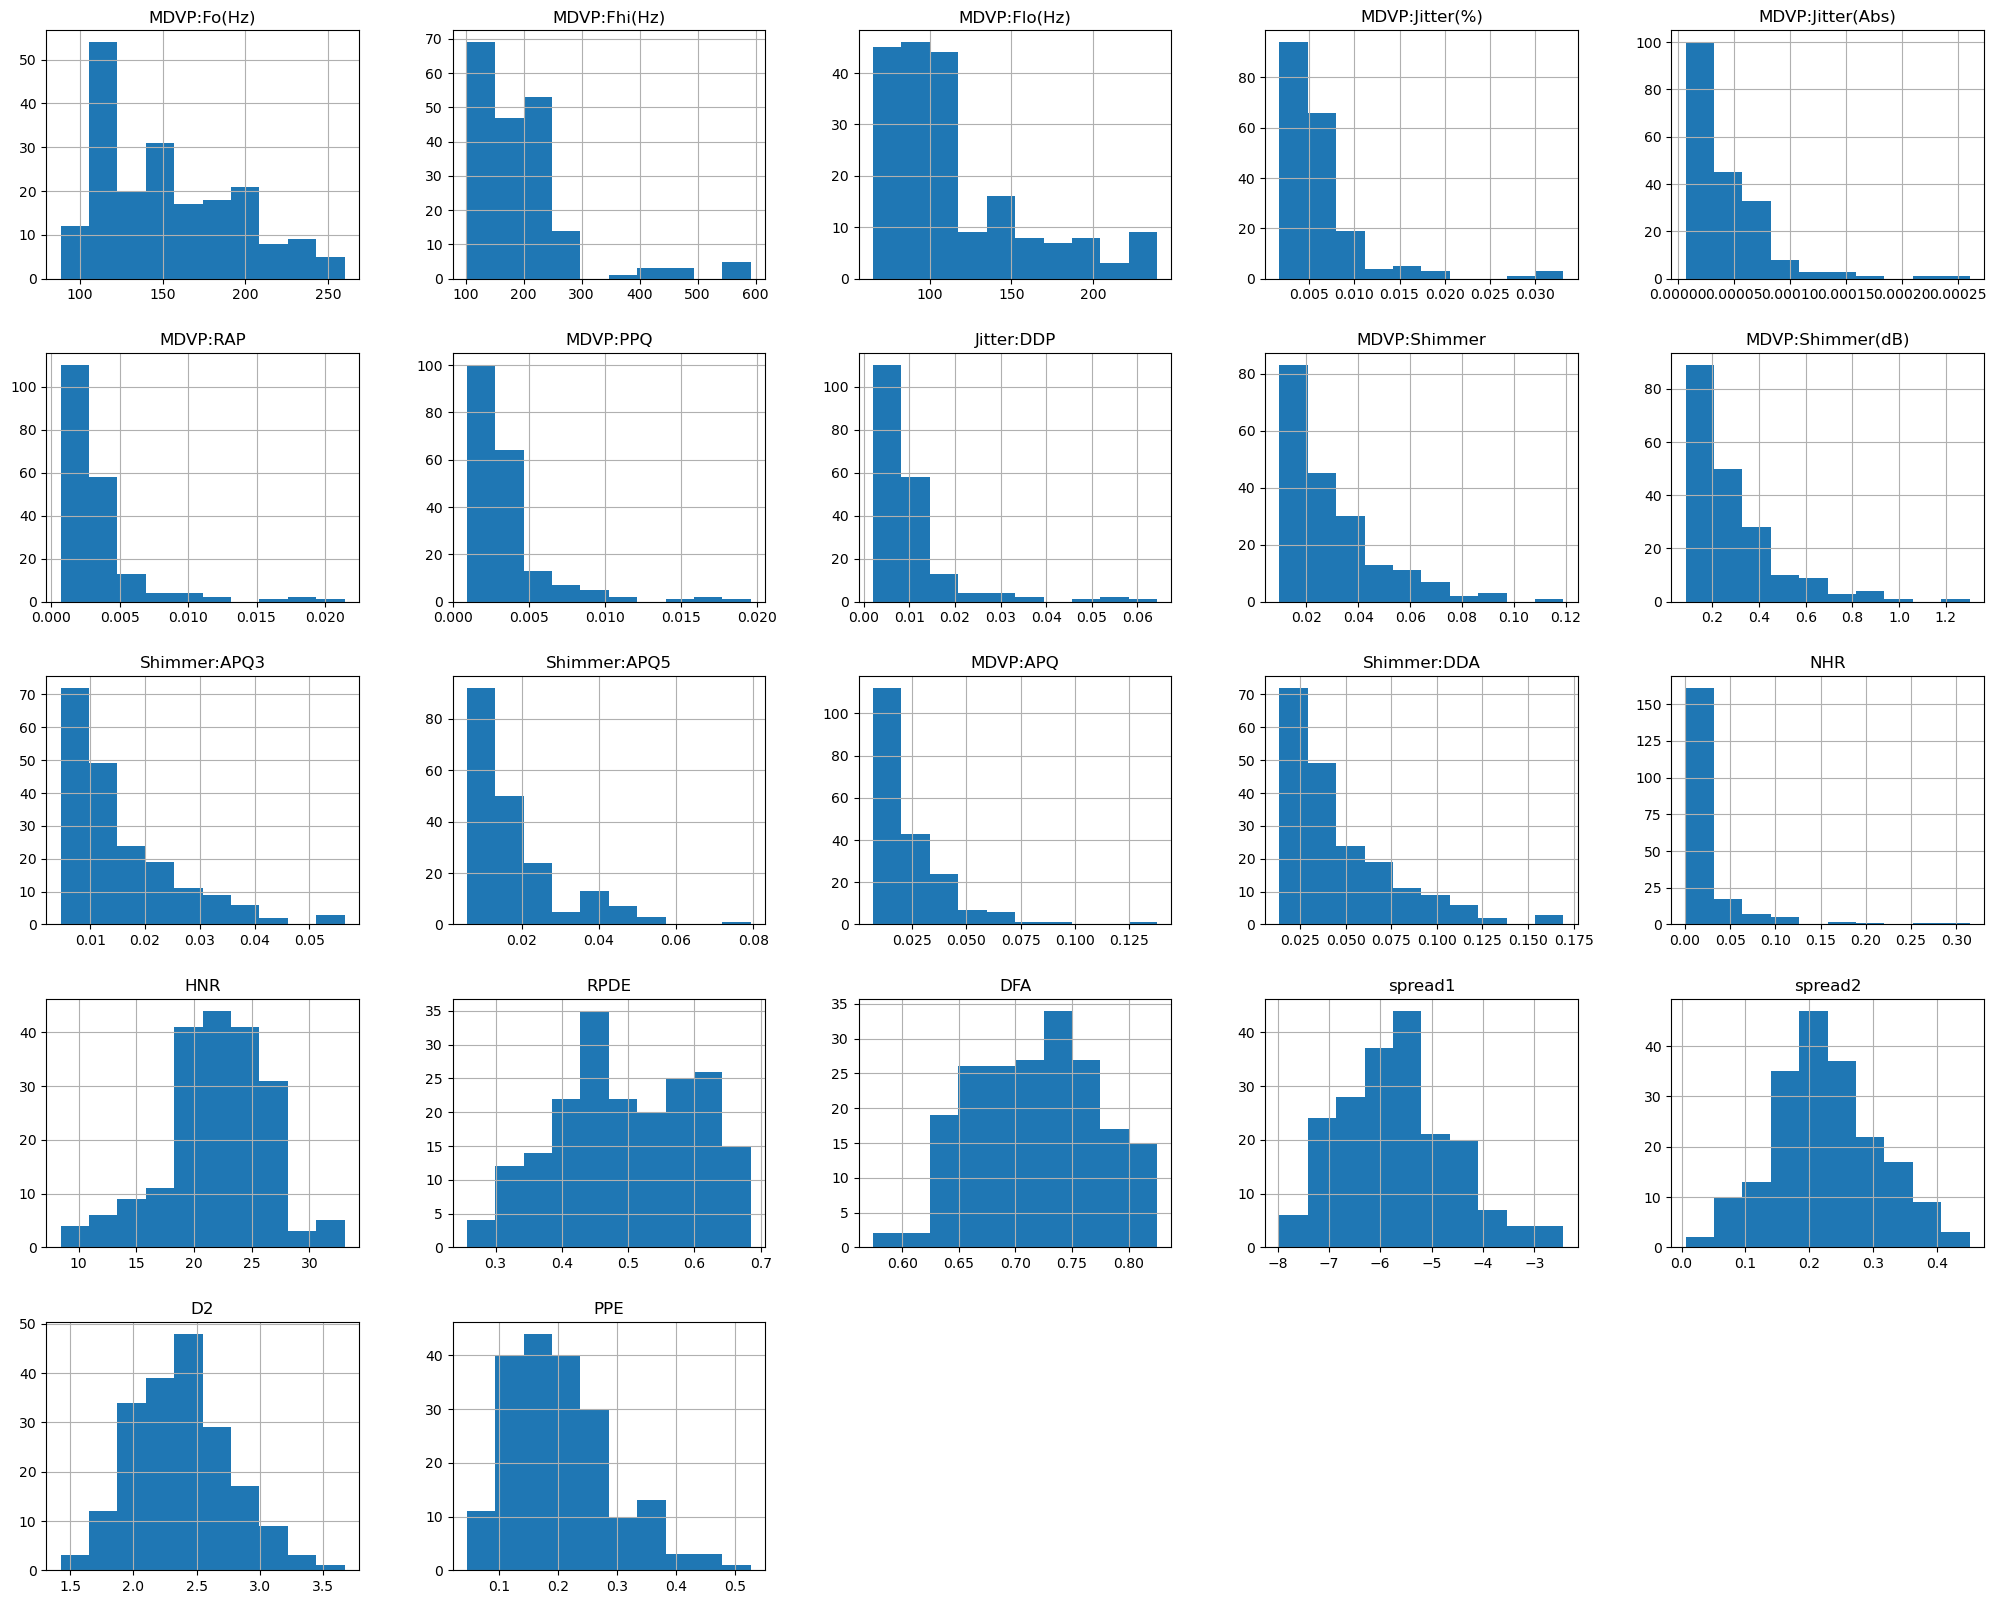

In [291]:
x1.hist(figsize=(25,20))
#plotting histogram, width = 25  height = 20 
plt.show()

In [292]:
#Filter data
dataset[dataset['status']==1].head()

,name,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [293]:
dataset.corr()
#calculating the correlation of our dataset

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14188\3420258319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
avg_fre,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
max_fre,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
min_fre,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
var_fre1,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
var_fre2,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
var_fre3,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
var_fre4,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
var_fre5,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
var_amp1,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
var_amp2,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


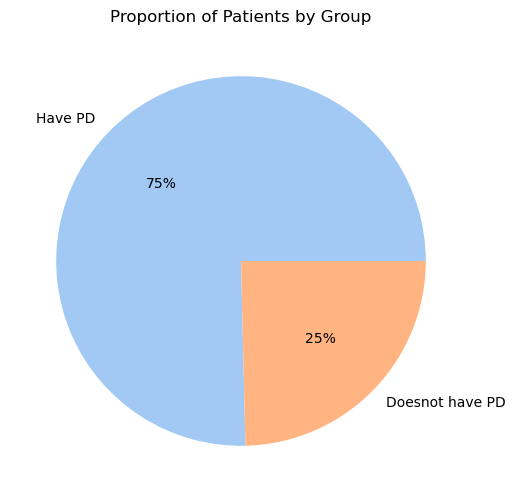

In [294]:
#Define plot size
plt.figure(figsize=[6,6])

#Define column to use
data = dataset["status"].value_counts(normalize=True)

#Define labels
labels = ["Have PD","Doesnot have PD",]

#Define color palette
colors = sns.color_palette('pastel')

#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Patients by Group")
plt.show()

In [295]:
dataset["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14188\3630100805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl=x1.corr()


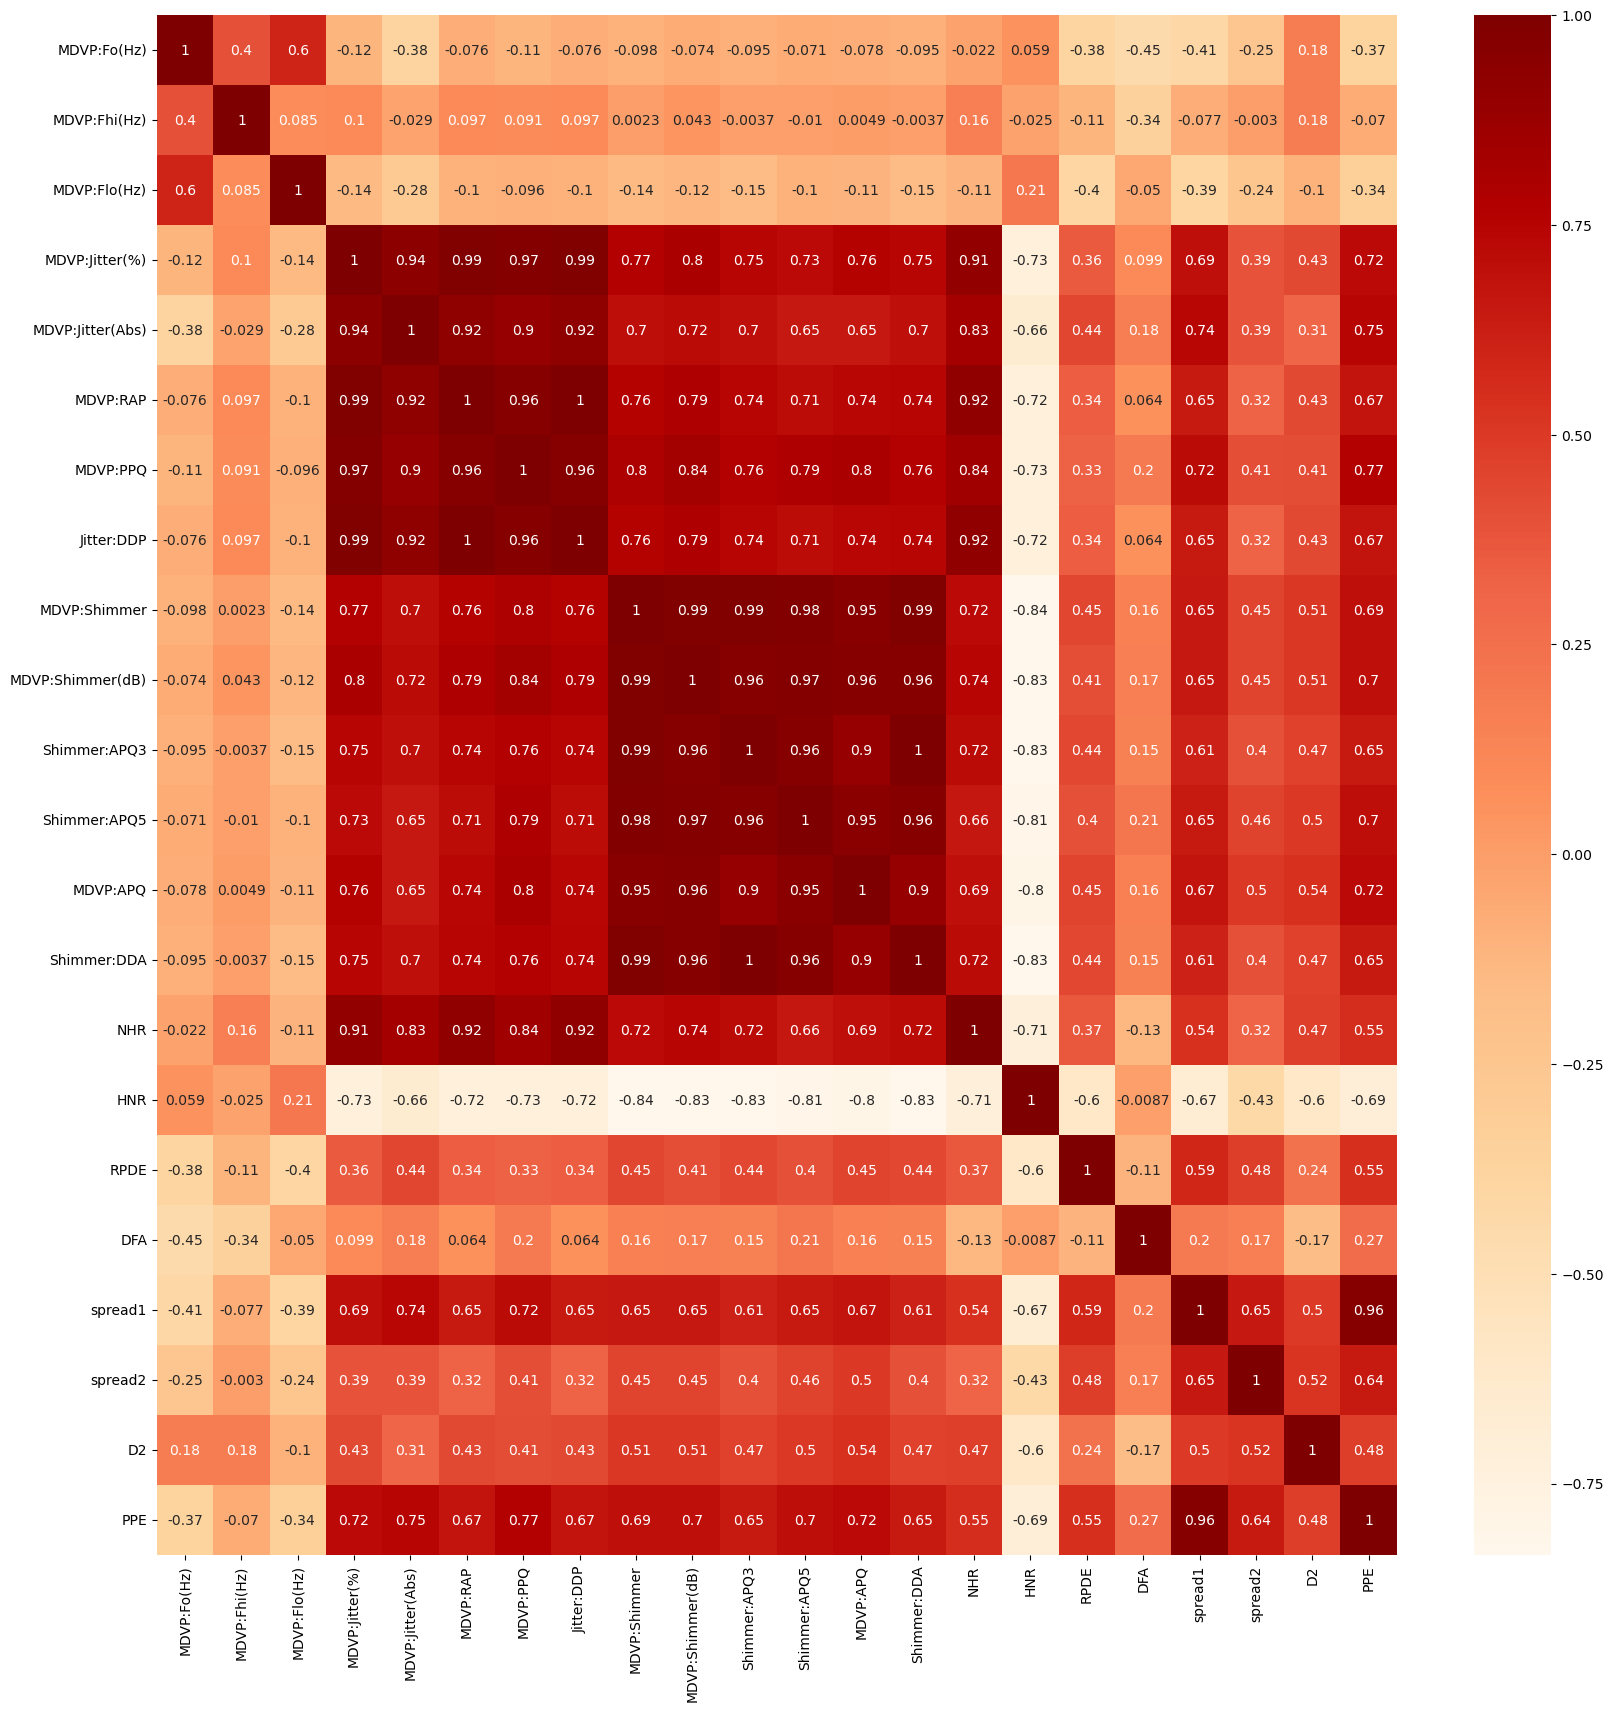

In [296]:
correl=x1.corr()
#plotting a heatmap
plt.figure(figsize=(20,20))
#size of heatmap = 20, 20
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

# Traning Test Data Split

In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [298]:
print(X_train)

[[178.285 442.824 82.063 ... 0.393056 2.816781 0.251972]
 [110.707 122.611 105.007 ... 0.315074 1.862092 0.228624]
 [163.656 200.841 76.779 ... 0.22089 2.692176 0.215961]
 ...
 [148.272 164.989 142.299 ... 0.08784 2.344336 0.186489]
 [148.143 155.982 135.041 ... 0.240875 2.845109 0.19273]
 [139.224 586.567 66.157 ... 0.270641 2.690917 0.444774]]


In [299]:
print(y_train)

[1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1]


In [300]:
len(y_train)

165

# Feature Scaling

In [301]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#fitting our training and test set into the object sc 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [302]:
print(X_train)

[[ 0.57443539  2.69031186 -0.84105811 ...  1.99515834  1.12162997
   0.52426398]
 [-1.0449502  -0.79688119 -0.30314976 ...  1.06789728 -1.30452229
   0.27076034]
 [ 0.22387764  0.05506146 -0.96493833 ... -0.05201701  0.80497114
   0.13327034]
 ...
 [-0.14477233 -0.33537505  0.57113888 ... -1.63407549 -0.07899505
  -0.18672535]
 [-0.14786359 -0.43346334  0.40097941 ...  0.18561875  1.19361995
  -0.11896296]
 [-0.36159143  4.25570612 -1.21396477 ...  0.53955752  0.80177164
   2.61763425]]


In [303]:
print(X_test)

[[-1.00823857 -0.75334205 -0.32453105 -0.27287072 -0.08126011 -0.27831254
  -0.17990485 -0.27735223  1.37489947  1.1616505   1.45015892  1.38660093
   1.15411437  1.45049047  0.0410497  -0.98899305  1.39605147 -0.38552028
   0.09925004  0.96016748  0.11139161  0.05976427]
 [-0.24263807  1.67136754 -0.82462359 -0.13124355 -0.08126011 -0.36487233
  -0.17304222 -0.36604873 -0.47335148 -0.44563355 -0.56827547 -0.47951612
  -0.19385088 -0.56796776 -0.14101922  0.07714721  0.69590014 -1.42396158
   0.27695043  0.17240818 -0.28187983  0.15718967]
 [-0.87330175 -0.74528328 -0.52242525  0.07136197  0.19633655  0.09998578
  -0.14559171  0.09880641  0.06118161 -0.03021244  0.09460874  0.00423268
  -0.00784642  0.09460404  0.0415226   0.09818239  1.27570329 -1.28968859
   1.97261817 -0.20631082  0.16309184  0.02789717]
 [ 0.11508468 -0.29264178  0.63003121 -0.52858643 -0.63645344 -0.47066762
  -0.54362417 -0.46970608  0.21229     0.12309773  0.2358319   0.18043257
   0.2229579   0.23550863 -0.3791

# Logistic Regression

In [304]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [305]:
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [306]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [307]:
lr.score(X_test,y_test)*100
#calculating accuracy

96.66666666666667

In [308]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3  1]
 [ 0 26]]


0.9666666666666667

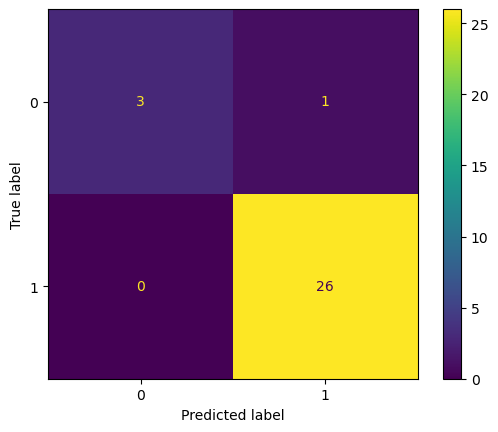

In [309]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()


In [310]:
newinput=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728,2.381826,0.206552]]

In [311]:
output=lr.predict(newinput)
output

array([0], dtype=int64)

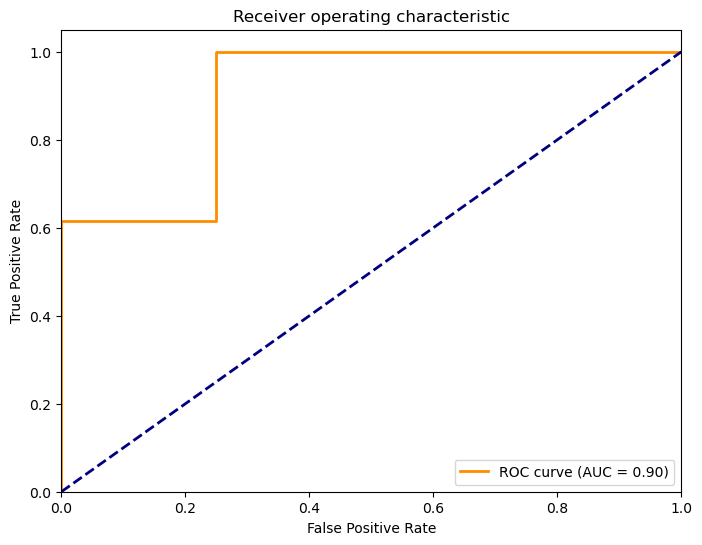

In [312]:
y_predict = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
# lw =2; width of the line plot is set to 2 points
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
#setting limit of x-asis from 0.0 to 1.0
plt.ylim([0.0, 1.05])
#setting limit of y-axis from 0.0 to 1.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# XGBOOST

In [313]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [314]:
y_pred= xgb.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1])

In [315]:
len(y_pred)

30

In [316]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [317]:
xgb.score(X_test,y_test)*100

93.33333333333333

In [318]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3  1]
 [ 1 25]]


0.9333333333333333

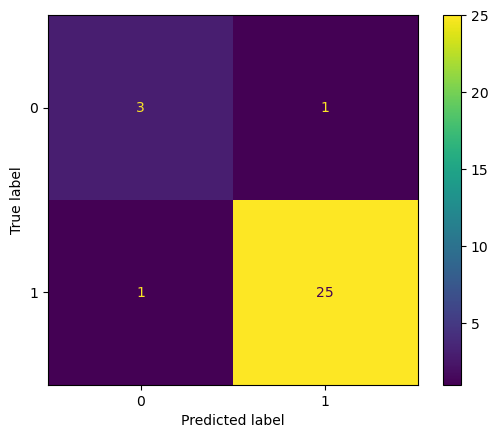

In [319]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()


In [320]:
newinput=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728,2.381826,0.206552]]

In [321]:
output= xgb.predict(newinput)
output


array([1])

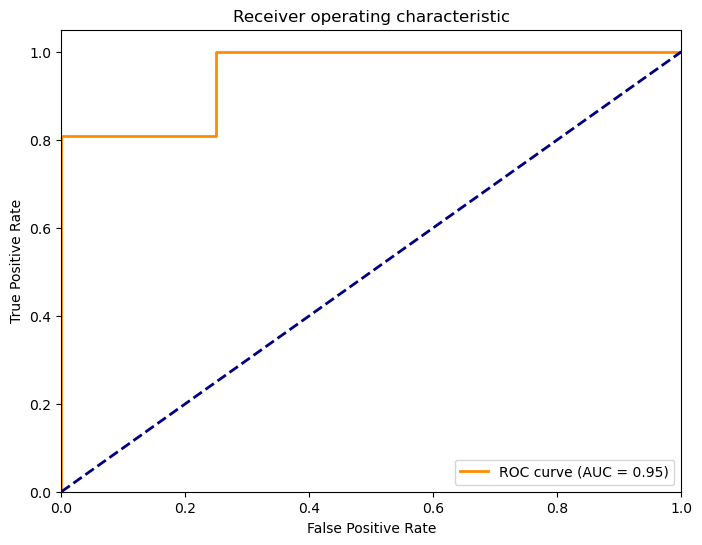

In [322]:
y_predict = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine(SVM)

In [323]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',degree=1, random_state = 0)
classifiers = SVC(kernel = 'rbf', random_state = 4)
classifier.fit(X_train, y_train)

SVC(degree=1, random_state=0)

In [324]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [325]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [326]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [327]:
classifier.score(X_test,y_test)*100

96.66666666666667

In [328]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3  1]
 [ 0 26]]


0.9666666666666667

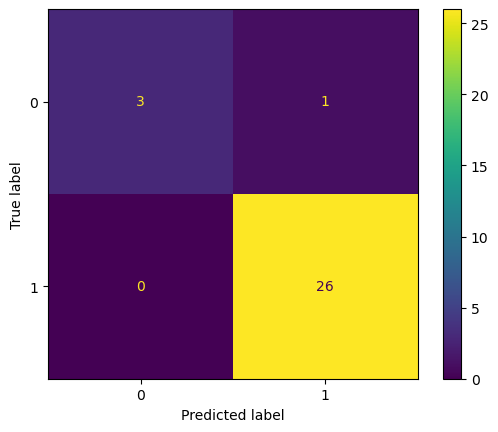

In [330]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()


In [331]:
newinput=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728,2.381826,0.206552]]

In [332]:
output=classifier.predict(newinput)
output

array([1], dtype=int64)

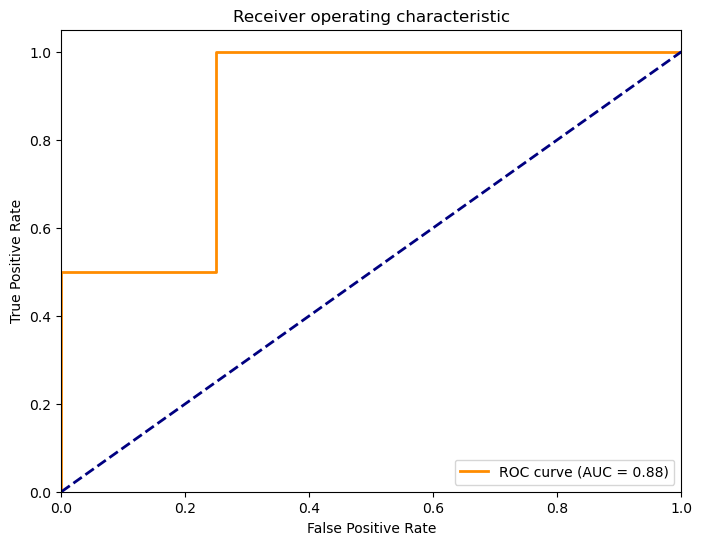

In [333]:

classifiers.fit(X_train, y_train)
y_predi = classifiers.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predi)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Naive bayes

In [334]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [335]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [336]:
y_pred=gnb.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [337]:
gnb.score(X_test,y_test)*100

76.66666666666667

In [338]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3  1]
 [ 6 20]]


0.7666666666666667

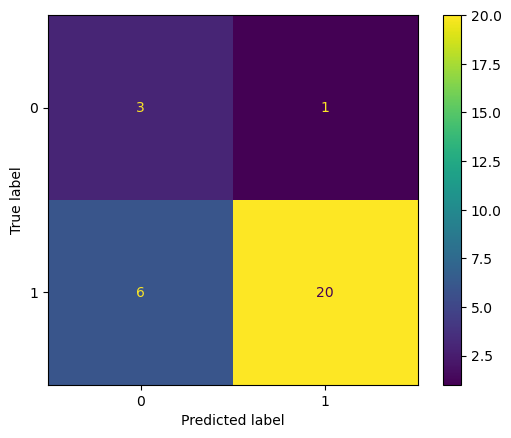

In [339]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()


In [340]:
newinput=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728,2.381826,0.206552]]

In [341]:
output=gnb.predict(newinput)
output

array([0], dtype=int64)

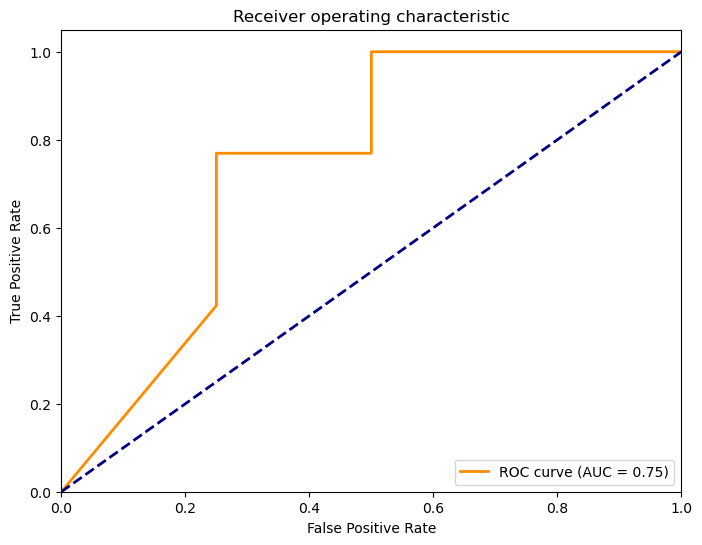

In [342]:
y_predict = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict)


roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [343]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [344]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [345]:
y_pred=dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [346]:
dt.score(X_test,y_test)*100

96.66666666666667

In [347]:
newinput=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728,2.381826,0.206552]]

In [348]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3  1]
 [ 0 26]]


0.9666666666666667

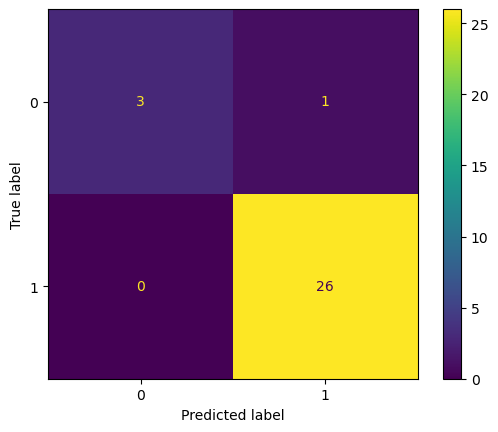

In [349]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()


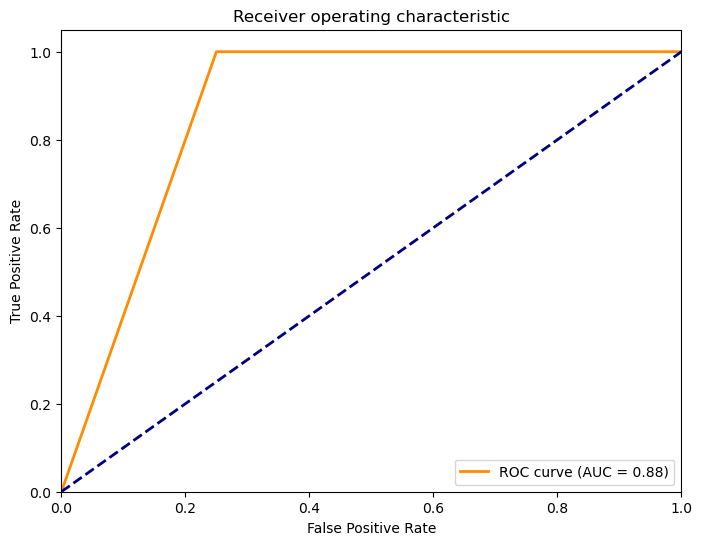

In [350]:
y_predict = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict)


roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [351]:
from sklearn.ensemble import RandomForestClassifier
rclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [352]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [353]:
y_pred=rclassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [354]:
rclassifier.score(X_test,y_test)*100

93.33333333333333

newinput=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728,2.381826,0.206552]]

In [355]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3  1]
 [ 1 25]]


0.9333333333333333

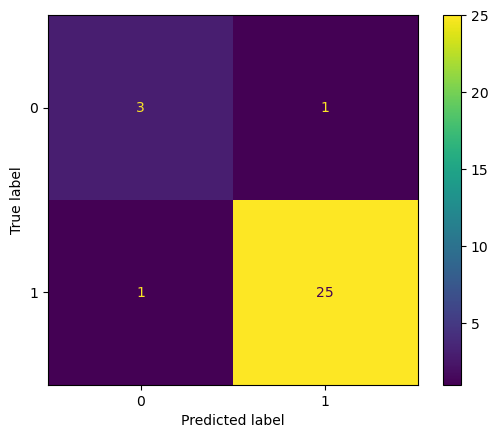

In [356]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rclassifier.classes_)
disp.plot()
plt.show()


In [357]:
output=rclassifier.predict(newinput)
output

array([1], dtype=int64)

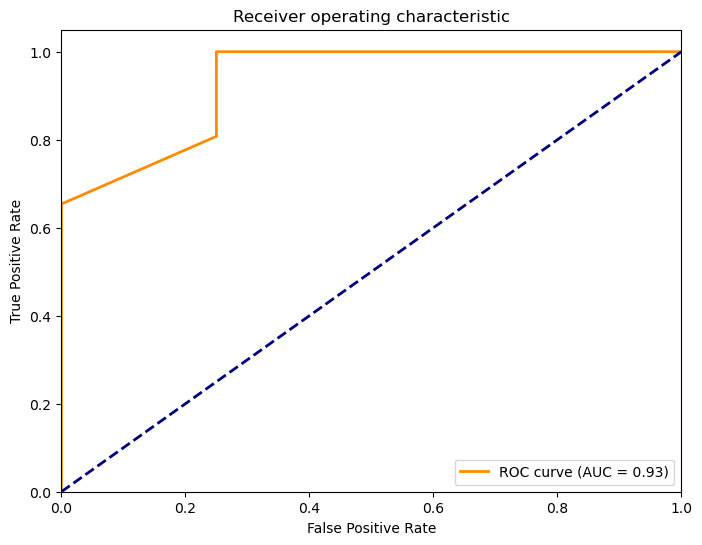

In [358]:
y_predict = rclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict)


roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# K-Nearest Neighbour

In [359]:
from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [360]:
y_pred=kclassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [361]:
kclassifier.score(X_test,y_test)*100

96.66666666666667

In [362]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3  1]
 [ 0 26]]


0.9666666666666667

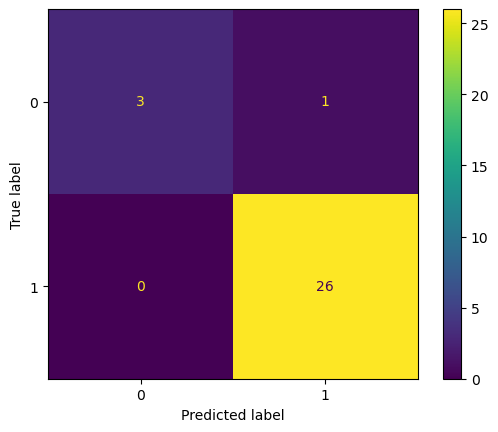

In [363]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kclassifier.classes_)
disp.plot()
plt.show()


In [364]:
newinput=[[274.688,240.005,174.287,0.01360,0.01008,0.00624,0.00564,0.01873,1.02308,0.256,0.51268,0.01365,0.81667,0.63804,0.10715,6.883,0.607567,0.158453,3.679772,0.131728,2.381826,0.206552]]

In [365]:
output=kclassifier.predict(newinput)
output

array([0], dtype=int64)

In [366]:
#geting our columns

print(dataset.columns)

Index(['name', 'avg_fre', 'max_fre', 'min_fre', 'var_fre1', 'var_fre2',
       'var_fre3', 'var_fre4', 'var_fre5', 'var_amp1', 'var_amp2', 'var_amp3',
       'var_amp4', 'var_amp5', 'var_amp6', 'NHR', 'HNR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [367]:
def pd(avg_fre, max_fre, min_fre, var_fre1, var_fre2,var_fre3, var_fre4, var_fre5, var_amp1, var_amp2, var_amp3,
       var_amp4, var_amp5, var_amp6, NHR, HNR,RPDE,DFA, spread1, spread2, D2, PPE):
#turning the arguments into a numpy array  

 x = np.array([avg_fre, max_fre, min_fre, var_fre1, var_fre2,var_fre3, var_fre4, var_fre5, var_amp1, var_amp2, var_amp3,
       var_amp4, var_amp5, var_amp6, NHR, HNR,RPDE,DFA, spread1, spread2, D2, PPE])

 output=kclassifier.predict(x.reshape(1, -1))
 if output==1:
        return("You may have PD.Plese consult doctor")
 elif output==0:
  return("You may not have PD")


In [368]:
#outputs = gr.outputs.Textbox()

#app = gr.Interface(fn=pd, inputs=['number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number'], outputs=outputs,description="This is a K-NN model")

In [369]:
#app.launch()


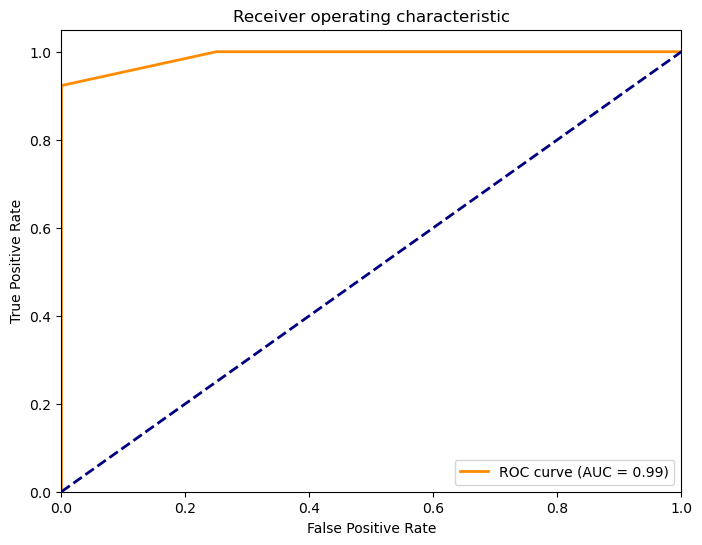

In [370]:
y_predict = kclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict)


roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [371]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


# Define parameter grid to search over
param_grid = {
    'C': [0.1, 1,5, 10, 12],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly']
}
#param_grid is a dictionary of all hyper parameters

#c determines the margin between support vectors and decision boundary ; c inversely proportional to margin
#gamma determines the shape of decision boundary, small value of gamma means smooth boundary and vice versa
#kernel determines the type of deicision boundary to be used


svm = SVC()

# Use grid search to find optimal hyperparameters
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
#cv = 5 ; 5 folds of cross validation
grid_search.fit(X_train, y_train)

# Print best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
#prints the most feasible parameters
print("Best score:", grid_search.best_score_)





Best hyperparameters: {'C': 12, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.9454545454545455


In [372]:
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


iris = load_iris()
x, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier()

# Define the hyperparameters to search over and their distributions
param_dist = {'n_estimators': randint(10, 100),
              'max_depth': [3, 5, 10, None],
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 10),
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']}

#n_estimators: The number of trees in the forest
#max_depth: The maximum depth of each decision tree in the forest
#max_features: The number of features to consider when looking for the best split
#min_samples_split: The minimum number of samples required to split an internal node
#bootstrap: Whether to use bootstrapping when building the trees, gives boolean value
#criterion: The function to measure the quality of a split

# Set up the randomized search
rs = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, cv=5, n_iter=100, random_state=42, n_jobs=-1)
#n_iter = 100; 100 different combinations of hyperparameters will be sampled and evaluated
#n_jobs: The number of CPU cores to use for parallel processing.  n_jobs=-1 specifies that all available CPU cores will be used.

rs.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print(f"Best hyperparameters: {rs.best_params_}")
print(f"Best score: {rs.best_score_:.3f}")


Best hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 61}
Best score: 0.967
